In [1]:
# import the class DATImage 
from DATImage import DATImage 
import matplotlib 
matplotlib.use('nbagg')
import matplotlib.pyplot as plt

In [2]:
filename = '../testfiles/LEEM.dat'
im = DATImage(filename) #instance DATImage class

In [3]:
im.data # data attribute contain the image in 2D array.

array([[3047, 2880, 2652, ..., 2716, 2630, 2562],
       [2789, 2848, 2862, ..., 2549, 2485, 2655],
       [2808, 2840, 2739, ..., 2640, 2602, 2747],
       ...,
       [3054, 2675, 2656, ..., 1926, 2017, 2021],
       [2885, 2949, 2705, ..., 1907, 1886, 1945],
       [2810, 2688, 2807, ..., 2009, 2025, 2641]], dtype=uint16)

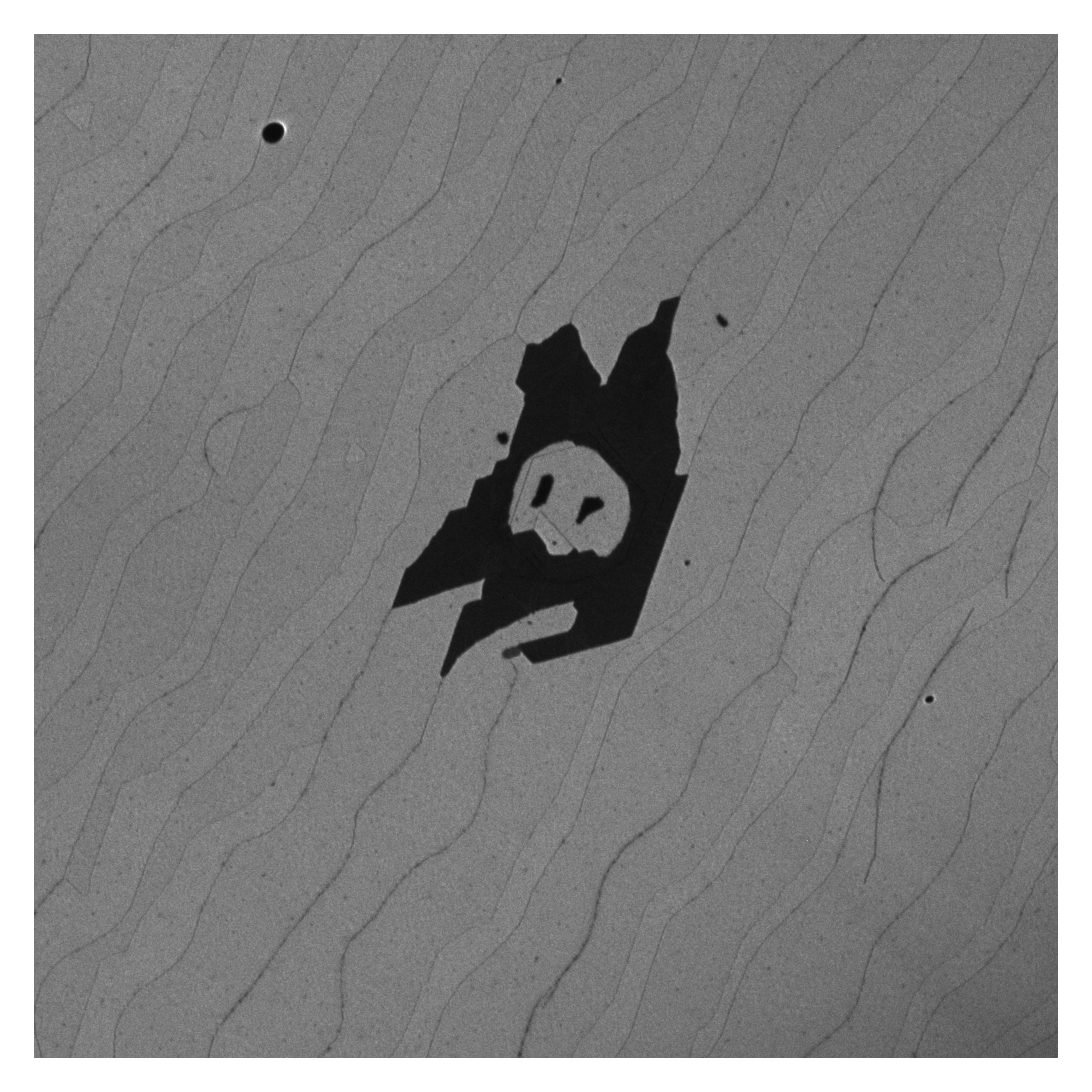

(<Figure size 1024x1024 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x250665dc0c8>)

In [4]:
im.display_image()

In [5]:
im.metadata # metadata attribute of DATImage contains the metadata.

{'id': b'UKSOFT2001',
 'size': 104,
 'version': 8,
 'bitsperpix': 16,
 'width': 1024,
 'height': 1024,
 'attachedRecipeSize': 0,
 'isize': 288,
 'iversion': 7,
 'colorscale_low': 1,
 'colorscale_high': 3228,
 'timestamp': datetime.datetime(2019, 11, 12, 16, 6, 20, 476000),
 'mask_xshift': 0,
 'mask_yshift': 0,
 'usemask': b'@',
 'att_markupsize': 22,
 'spin': 0,
 'Acc. Lens': [1231.79833984375, 'V'],
 'AL Align. A': [99998.8984375, 'mA'],
 'AL Align. B': [171.17044067382812, 'mA'],
 'Ana.Stigm.A': [99998.8984375, 'mA'],
 'Ana.Stigm.B': [99998.8984375, 'mA'],
 'Bias': [1025.72021484375, 'V'],
 'Bomb. Voltage': [99999.8984375, 'V'],
 'Camera Exposure': [1.0, 's'],
 'Average Images': 8,
 'CL2 Align. X': [-78.52001953125, 'mA'],
 'CL2 Align. Y': [24.660005569458008, 'mA'],
 'CL3 Align. X': [-167.0, 'mA'],
 'CL3 Align. Y': [41.79999923706055, 'mA'],
 'COL': [4.849999846179287e-10, 'Torr'],
 'Cond. Lens 1': [896.9998779296875, 'mA'],
 'Cond. Lens 2': [2512.10009765625, 'mA'],
 'Cond. Lens 3'

In [6]:
im.data

array([[3047, 2880, 2652, ..., 2716, 2630, 2562],
       [2789, 2848, 2862, ..., 2549, 2485, 2655],
       [2808, 2840, 2739, ..., 2640, 2602, 2747],
       ...,
       [3054, 2675, 2656, ..., 1926, 2017, 2021],
       [2885, 2949, 2705, ..., 1907, 1886, 1945],
       [2810, 2688, 2807, ..., 2009, 2025, 2641]], dtype=uint16)

## Convert to Xarray dataset

In [21]:
import xarray as xr
im.metadata['units'] = 'pixel'
im_dataarray = xr.DataArray(im.data,
                            coords={'height': range(im.metadata['height']),
                                     'width': range(im.metadata['width']),
                                     'time': im.metadata['timestamp']},
                            dims=['height', 'width'],
                            name = "Intensity",
                            attrs = im.metadata
                           )
# data values                            
# im_dataarray.values 
# data dimensions 
# im_dataarray.dims
# data coordinations
# im_dataarray.coords
# data sttributes
# im_dataarray.attrs


<xarray.DataArray 'Intensity' (height: 1024, width: 1024)>
array([[3047, 2880, 2652, ..., 2716, 2630, 2562],
       [2789, 2848, 2862, ..., 2549, 2485, 2655],
       [2808, 2840, 2739, ..., 2640, 2602, 2747],
       ...,
       [3054, 2675, 2656, ..., 1926, 2017, 2021],
       [2885, 2949, 2705, ..., 1907, 1886, 1945],
       [2810, 2688, 2807, ..., 2009, 2025, 2641]], dtype=uint16)
Coordinates:
  * height   (height) int32 0 1 2 3 4 5 6 ... 1017 1018 1019 1020 1021 1022 1023
  * width    (width) int32 0 1 2 3 4 5 6 ... 1017 1018 1019 1020 1021 1022 1023
    time     datetime64[ns] 2019-11-12T16:06:20.476000
Attributes:
    id:                  b'UKSOFT2001'
    size:                104
    version:             8
    bitsperpix:          16
    width:               1024
    height:              1024
    attachedRecipeSize:  0
    isize:               288
    iversion:            7
    colorscale_low:      1
    colorscale_high:     3228
    timestamp:           2019-11-12 16:06:20.47600

In [30]:
im_dataarray.attrs

10.0